In [27]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from load_clean_data import load_data
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, balanced_accuracy_score
from

In [28]:
df_tested_data_and_descriptors = load_data("tested_molecules_with_descriptors.csv")

df_descriptors = df_tested_data_and_descriptors[['PKM2_inhibition', 'ERK2_inhibition']]
df_smiles = df_tested_data_and_descriptors["SMILES"]
#Take columns of which the EDA showed the greatest effects
columns_to_keep = ["BCUT2D_MRHI", "MinEStateIndex", "BCUT2D_MWHI", "SMR_VSA10", 
                   "PEOE_VSA3", "MinAbsPartialCharge", "MaxPartialCharge", 
                   "NHOHCount", "SlogP_VSA6", "EState_VSA5", "SlogP_VSA8", "fr_C_O", 
                   "MolLogP", "PEOE_VSA11", "VSA_EState5", "Chi0v", "Chi4v",
                   "SlogP_VSA10", "fr_aniline", "fr_nitro"]
# Filter df_tested_data to keep only the selected columns
df_tested_data = df_tested_data_and_descriptors[columns_to_keep]
#df_tested_data = df_tested_data_and_descriptors.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES']) #met alles

# remove columns of zero variance
zero_variance_columns = df_tested_data.columns[df_tested_data.nunique() <= 1]
df_tested_data = df_tested_data.drop(columns=zero_variance_columns)

scalerminmax = MinMaxScaler()
df_scaled_tested = scalerminmax.fit_transform(df_tested_data)

Accuracy: 91.94%
Balanced accuracy: 63.17%
Confusion Matrix:
 [[306  23]
 [  4   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       329
           1       0.08      0.33      0.13         6

    accuracy                           0.92       335
   macro avg       0.53      0.63      0.54       335
weighted avg       0.97      0.92      0.94       335



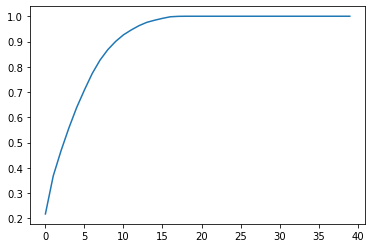

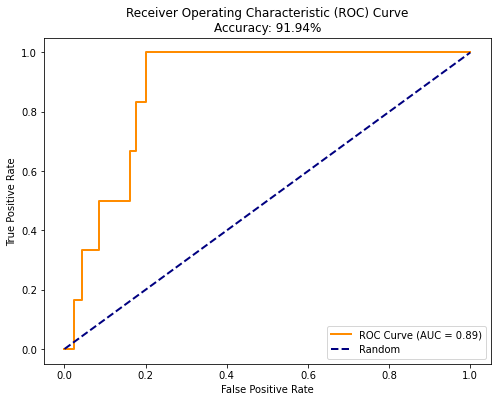

In [29]:
# Split the data into X and y
y = df_descriptors.pop('PKM2_inhibition')
X = df_scaled_tested

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the data into training and test data set
X_train, X_test, y_train, y_test_PKM2 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)
 
# Decide the number of PCA components based on the retained information
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance)

# Determine the number of components needed to explain 90% of the variance
desired_variance = 0.90
num_components = (np.argmax(explained_variance >= desired_variance) + 1)

#loose components who have too little influence
pca=PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logr_model=LogisticRegression(class_weight={0: 1, 1: 10}) #weights have a lot of effects
logr_model.fit(X_train_pca,y_train)

y_pred_PKM2 = logr_model.predict(X_test_pca)
accuracy_PKM2 = accuracy_score(y_test_PKM2, y_pred_PKM2)
balanced_accuracy_PKM2=balanced_accuracy_score(y_test_PKM2, y_pred_PKM2)
print("Accuracy: {:.2f}%".format(accuracy_PKM2 * 100))
print("Balanced accuracy: {:.2f}%".format(balanced_accuracy_PKM2 * 100))

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_PKM2, y_pred_PKM2))
print("\nClassification Report:\n", classification_report(y_test_PKM2, y_pred_PKM2))

# Plot ROC Curve
y_prob_PKM2 = logr_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_PKM2, y_prob_PKM2)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy_PKM2 * 100))
plt.legend(loc="lower right")
plt.show()


Accuracy: 85.67%
Balanced accuracy: 50.36%
Confusion Matrix:
 [[285  31]
 [ 17   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       316
           1       0.06      0.11      0.08        19

    accuracy                           0.86       335
   macro avg       0.50      0.50      0.50       335
weighted avg       0.89      0.86      0.87       335



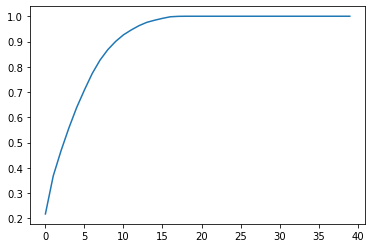

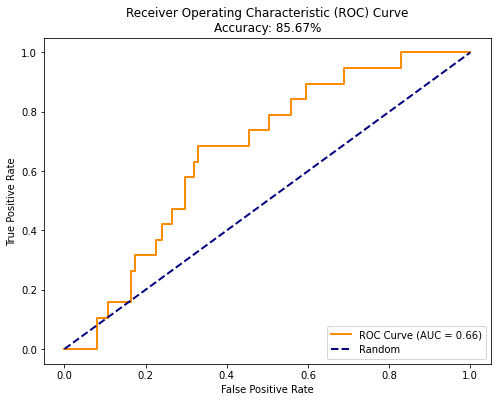

In [30]:

X=df_scaled_tested
y=df_descriptors.pop('ERK2_inhibition')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the data into training and test data set
X_train, X_test, y_train, y_test_ERK2 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)
 
# Decide the number of PCA components based on the retained information
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance)

# Determine the number of components needed to explain 90% of the variance
desired_variance = 0.90
num_components = (np.argmax(explained_variance >= desired_variance) + 1)

#loose components who have too little influence
pca=PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



logr_model=LogisticRegression(class_weight={0: 1, 1: 10})
logr_model.fit(X_train_pca,y_train)



y_pred_ERK2 = logr_model.predict(X_test_pca)
accuracy_ERK2  = accuracy_score(y_test_ERK2, y_pred_ERK2)
balanced_accuracy_ERK2 =balanced_accuracy_score(y_test_ERK2, y_pred_ERK2)
print("Accuracy: {:.2f}%".format(accuracy_ERK2  * 100))
print("Balanced accuracy: {:.2f}%".format(balanced_accuracy_ERK2  * 100))

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_ERK2, y_pred_ERK2))
print("\nClassification Report:\n", classification_report(y_test_ERK2, y_pred_ERK2))


# Plot ROC Curve
y_prob_ERK2 = logr_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_ERK2, y_prob_ERK2)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy_ERK2  * 100))
plt.legend(loc="lower right")
plt.show()

In [31]:
#total for both 
accuracy= (accuracy_ERK2+ accuracy_PKM2)/2
balanced_accuracy=(balanced_accuracy_ERK2 + balanced_accuracy_PKM2)/2
print("Accuracy: {:.2f}%".format(accuracy  * 100))
print("Balanced accuracy: {:.2f}%".format(balanced_accuracy * 100))

Accuracy: 88.81%
Balanced accuracy: 56.76%
